# Clasificación de imágenes con Red Neuronal Convolucional (LeNet)

In [2]:
# Importo librerías
# Manejo y visualización de datos
import numpy as np
import matplotlib.pyplot as plt
# Formato de datos
from tensorflow.keras.utils import to_categorical
# Librería para contenedor del modelo
from tensorflow.keras.models import Sequential
# Implementación capas convolucionales
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# Librerías red neuronal
from tensorflow.keras.layers import Flatten, Dense
# Librería método 'gradiente descendiente' para entrenamiento
from keras.optimizers import SGD

In [33]:
# Utilizo el set de datos de 'mnist' que son gráficos de numeros escritos por diferentes personas
from keras.datasets import mnist

In [34]:
# Cargo los datos y creo los conjuntos de entrenamiento y prueba
(x_train, y_train), (x_test,y_test) = mnist.load_data()
# Veo las dimensiones de las imágenes y cuantas imágenes hay en cada conjunto
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [35]:
# Normalizo las imágenes para que las reconozca keras bien, con formato de pixels correcto
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# Asigna un valor de 1 a la columna correspondiente para cada muestra
#y_test = np.argmax(y_test, axis=1)
#y_train = np.argmax(y_train, axis=1)
# Verifica la forma de las etiquetas reales
#print("Forma de las etiquetas reales:", y_train.shape)

In [36]:
nclases = 10
y_train = to_categorical(y_train,nclases)
y_test = to_categorical(y_test,nclases)

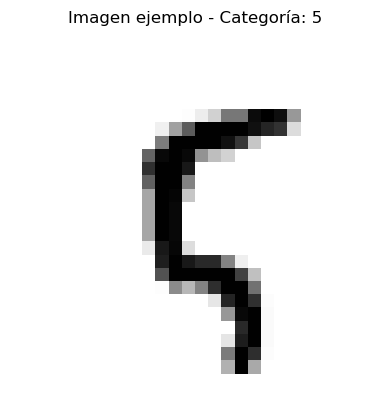

In [65]:
# Visualizo una de las imagenes del conjunto de datos de entrenamiento
nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()

In [39]:
# Especifico un solo canal o una sola capa por tratarse de una escala de grises
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [40]:
# Creo contenedor del modelo, donde se iran añadiendo las capas
modelo = Sequential()
# Añado primera capa convolucional
# Capa CONV2D, con 6 filtros de 5x5 sin padding y stride 1, al no especificarlos, keras ya lo hace automáticamente, por tratarse de la configuración mínima
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
# Capa MAX-POOLING, con 6 filtros igual que la anterior, y sin padding. Utilizo pool_size para determinar el tamaño de cada filtro.
modelo.add(MaxPooling2D(pool_size=(2,2)))
# Añado segunda capa convolucional igual que la anterior pero con 16 filtros
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
# Aplano el resultado con 'Flatten' y creo la red neuronal con 120 neuronas para la primera capa, y 84 para la segunda, con una salida 'softmax' con 10 categorías
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclases,activation='softmax'))

In [41]:
# Uso el modelo para ver las salidas del conjunto de datos de prueba, y poder comprobar con las etiquetas reales, que son compatibles y tienen el mismo formato.
predicted_outputs = modelo.predict(x_test)

# Imprimo la forma de las salidas generadas
print("Forma de las salidas generadas por el modelo:", predicted_outputs.shape)

# Imprimo la forma de las etiquetas reales
print("Forma de las etiquetas reales:", y_test.shape)

313/313 [==============================] - 1s 4ms/step
Forma de las salidas generadas por el modelo: (10000, 10)
Forma de las etiquetas reales: (10000, 10)


In [42]:
# Compilo el modelo.
# Creo el optimizador utilizando el método 'gradiente descendente', en una tasa de aprendizaje de 0,1
sgd = SGD(learning_rate=0.1)
# Asocio el optimizador al modelo, y defino función de error con 'entropía cruzada', y evaluación de aciertos 'accuracy' sobre el conjunto de entrenamiento y validación
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [43]:
# Defino la cantidad de iteraciones y la cantidad de imagenes por bloque para no tener problemas con la memoria
nepochs = 10
tam_lote = 128
# Entreno el modelo añadiendo evaluación simultanea
modelo.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.3994 - accuracy: 0.8736 - val_loss: 0.1480 - val_accuracy: 0.9528
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0931 - accuracy: 0.9704 - val_loss: 0.0613 - val_accuracy: 0.9799
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 0.0511 - val_accuracy: 0.9832
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0453 - val_accuracy: 0.9842
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0425 - val_accuracy: 0.9861
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0469 - val_accuracy: 0.9845
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0419 - val_accuracy: 0.9862

In [50]:
from sklearn.metrics import confusion_matrix
# Creo función para 
def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Genero gráfico
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    # Giro y alineo etiquetas
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Relleno gráfico con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

313/313 [==============================] - 1s 4ms/step


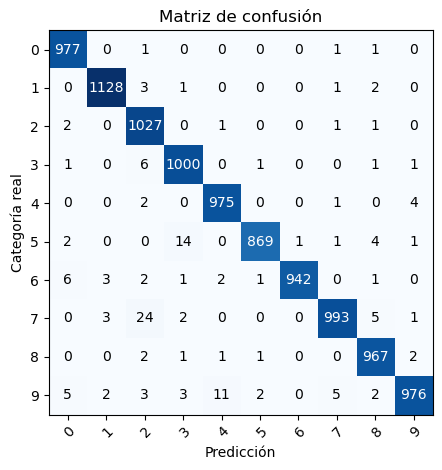

In [52]:
# Aplico la predicción del modelo sobre 'x_test', y almaceno en 'y_pred'
y_pred = np.argmax(modelo.predict(x_test), axis=1)
# Cargo los datos reales transformados con one-hot anteriormente y que están en 'y_test'
y_ref = np.argmax(y_test,axis=1)
# Creo etiquetas de las filas y columnas de la matriz
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
# Creo gráfico de matriz de confusión
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)

### Podemos observar como el grado de precisión del modelo es bastante elevado y osicla en un 98% o 99% de precisión